# Supervised Learning_Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 보스턴 집값 데이터

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data    = boston.data
label   = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns= columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape

(506, 13)

## 1. Simple Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data, label, 
                                                     test_size= 0.2,
                                                     random_state= 2022)

#### -1, 1의 비밀을 이해해야 함

In [8]:
X_train['RM'].values.reshape(-1,1)[:5]

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [9]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [10]:
sim_lr.fit( X_train['RM'].values.reshape((-1,1)), y_train )

LinearRegression()

In [11]:
y_pred = sim_lr.predict( X_test['RM'].values.reshape((-1,1)) )

### 결과 살펴보기

In [12]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2: 0.2121


#### 결과 시작화 하기

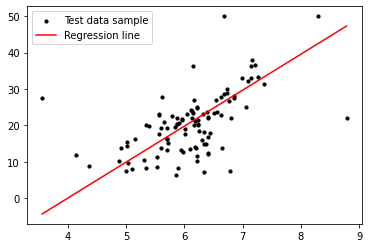

In [13]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s= 10, c= 'black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample', 'Regression line'], loc= 'upper left')

## 2. Multiple Linear Regression

In [14]:
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6226


## 3. Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

# depth: 높아질수록 좋아질 수 있음
dt_regr = DecisionTreeRegressor(max_depth= 6 )

### 1) 단순 결정 트리

In [18]:
dt_regr.fit( X_train['RM'].values.reshape((-1,1)) , y_train )

DecisionTreeRegressor(max_depth=6)

In [19]:
y_pred = dt_regr.predict( X_test['RM'].values.reshape(-1,1) )

In [20]:
print('단순 결정 트리 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)) )

단순 결정 트리 회귀 R2: 0.3474


#### 최적의 depth 찾고 출력하기

In [21]:
best_depth = 0
best_r2 = 0

for depth in np.arange(1,11):
    dt_regr = DecisionTreeRegressor(max_depth= depth)
    dt_regr.fit( X_train['RM'].values.reshape((-1,1)) , y_train )
    y_pred = dt_regr.predict( X_test['RM'].values.reshape(-1,1) )
    
    temp_r2 = r2_score(y_test,y_pred)
    
    if best_r2 < temp_r2:
        best_depth = depth
        best_r2 = temp_r2
        
print('최적의 결과는 depth = {}, r2= {:.4f}'.format(best_depth, best_r2) )
    

최적의 결과는 depth = 3, r2= 0.3931


### 2) 다중 결정 트리

#### 최적의 depth 찾고 출력하기

In [22]:
best_depth = 0
best_r2 = 0

for depth in np.arange(1,11):
    dt_regr = DecisionTreeRegressor(max_depth= depth)
    dt_regr.fit(X_train, y_train)
    y_pred = dt_regr.predict(X_test)
    
    temp_r2 = r2_score(y_test,y_pred)
    
    if best_r2 < temp_r2:
        best_depth = depth
        best_r2 = temp_r2
        
print('최적의 결과는 depth = {}, r2= {:.4f}'.format(best_depth, best_r2) )

최적의 결과는 depth = 7, r2= 0.7571


## 4. Support Vector Machine Regressor

In [23]:
from sklearn.svm import SVR
svm_regr = SVR(C= 5)

svm_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape((-1,1)))

print('단순 서포트 벡터 머신 호귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 호귀 R2: 0.4049


### 결과의 시각화

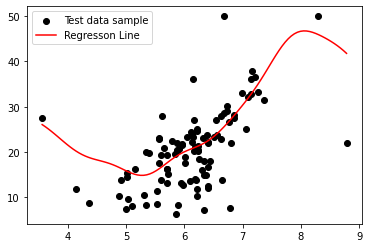

In [24]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100 )
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red' )
plt.legend(['Test data sample', 'Regresson Line' ], loc='upper left')

In [25]:
best_c = 0
best_r2 = 0

for value in range(1,500):
    svm_regr = SVR(C = value)
    svm_regr.fit(X_train, y_train)
    y_pred = svm_regr.predict(X_test)
    
    if best_r2 < r2_score(y_test, y_pred):
        best_r2 = r2_score(y_test, y_pred)
        best_c = value
#     print('다중 서포트 백터 머신 회귀 차원값 = {}, R2 : {:.4f}'.format(value, r2_score(y_test, y_pred)))
    
print('다중 서포트 백터 머신 BEST 회귀 차원값 = {}, R2 : {:.4f}'.format(best_c, best_r2))


다중 서포트 백터 머신 BEST 회귀 차원값 = 472, R2 : 0.6446
